# Microsoft Professional Program for Data Science 

#### This notebook shall help answering the questions as define below by analyzing state and county specific differences within the data set.

### Assesment Question:

This notebook shall answer the following assesment questions:

* For applicants in state 43, which of the following best describes the relationship between applicant income and loan amount?
    * A — A higher applicant income is associated with a higher loan amount, on average.
    * B — A higher applicant income is associated with a lower loan amount, on average.
    * C — There is not a strong and obvious correlation between applicant income and loan amount, on average.
* Limiting just to state 48 and ignoring where county is missing (missing value being -1), which of the following statements is true?
    * A — In state 48, the average rate spread across counties varies substantially, ranging from 0% to 10%.
    * B — In state 48, the average rate spread across counties varies substantially, ranging from around 1% to around 7%.
    * C — Counties within state 48 all have similar levels of loan rates.    
* Loan types across states -Looking just at states 2 and 3 and just loan types 1, 2, and 3 which of the following statements is true?
    * A — For loan types  1 ,  2 , and  3 , the average rate spread in state  2  is higher than the overall rate among states  2  and  3 .
    * B — For loan types  1 ,  2 , and  3 , the average rate spread in state  3  is lower than the overall rate among states  2  and  3 
    * C — For loan types  1 ,  2 , and  3 , the average rate spread in state  2  is higher than for the corresponding loan type in state  3 .
    * D — For loan types  1 ,  2 , and  3 , the average rate spread in state  2  is lower than for the corresponding loan type in state  3 .

In [1]:
# Import standard library set and shared definitions of file names and paths
%run -i MPPSharedDefines.py
%matplotlib inline

In [2]:
training_data_pd = pd.read_csv(TEMP_PATH+"/"+CLEANED_OUTPUT_FN)
print("Unique counties: {}".format(training_data_pd['county_code'].unique().shape[0]))
print("Unique states: {}".format(training_data_pd['state_code'].unique().shape[0]))

Unique counties: 306
Unique states: 53


In [3]:
training_data_pd.head(5)

,Unnamed: 0,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,rate_spread,sex,ethnicity,race,loan_type_name,property_type_name,purpose_name
0,0,0,2,1,1,1,139.0,1,261,14,246,2,5,1,77.0,5949.0,11.642,63192.0,100.000,1556.0,1993.0,2094,True,1.0,Male (1),Non-Hispanic(2),White(5),FHA-insured(2),1-4-family-non-mf(1),Home purchase(1)
1,1,1,2,2,1,1,160.0,3,349,48,311,1,5,1,42.0,2667.0,37.141,63693.0,75.729,875.0,1163.0,4194,False,2.0,Male (1),Hispanic/Latino(1),White(5),FHA-insured(2),Manufactured housing(2),Home purchase(1)
2,2,2,1,2,1,1,168.0,3,385,30,256,3,2,1,34.0,6393.0,79.635,42883.0,76.948,636.0,1611.0,1119,False,3.0,Male (1),Unknown(3),Asian(2),Conventional(1),Manufactured housing(2),Home purchase(1)
3,3,3,1,2,1,1,57.0,3,117,30,46,1,6,1,37.0,7175.0,72.843,63806.0,78.836,1587.0,2172.0,1119,False,6.0,Male (1),Hispanic/Latino(1),Unknown,Conventional(1),Manufactured housing(2),Home purchase(1)
4,4,4,2,1,2,1,25.0,3,95,41,192,2,5,2,46.0,5041.0,23.188,70908.0,59.579,756.0,1992.0,1593,False,4.0,Female (2),Non-Hispanic(2),White(5),FHA-insured(2),1-4-family-non-mf(1),Home improvement(2)


In [4]:
state_48 = training_data_pd.loc[training_data_pd['state_code']==48]
print(state_48.count())
print(state_48['county_code'].unique().shape[0])

Unnamed: 0                        25591
row_id                            25591
loan_type                         25591
property_type                     25591
loan_purpose                      25591
occupancy                         25591
loan_amount                       25591
preapproval                       25591
msa_md                            25591
state_code                        25591
county_code                       25591
applicant_ethnicity               25591
applicant_race                    25591
applicant_sex                     25591
applicant_income                  24520
population                        25478
minority_population_pct           25478
ffiecmedian_family_income         25478
tract_to_msa_md_income_pct        25476
number_of_owner-occupied_units    25476
number_of_1_to_4_family_units     25476
lender                            25591
co_applicant                      25591
rate_spread                       25591
sex                               25591


## Question:

* Limiting just to state 48 and ignoring where county is missing (missing value being -1), which of the following statements is true?
    * A — In state 48, the average rate spread across counties varies substantially, ranging from 0% to 10%.
    * B — In state 48, the average rate spread across counties varies substantially, ranging from around 1% to around 7%.
    * C — Counties within state 48 all have similar levels of loan rates.    

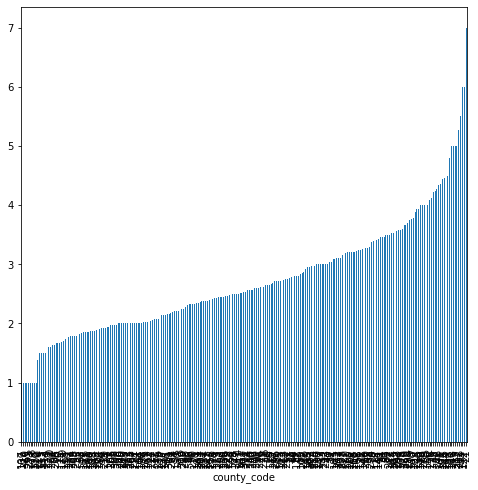

In [5]:
f = plt.figure(figsize=(8,8))
state_48.groupby('county_code')['rate_spread'].mean().sort_values().plot(kind='bar')

In regards to the assesment question about the spread distribution in the state 48 it ranges quite visibiy from 1 up to 7%.

### Important note: 

There are more than 3142 counties in the US: https://en.wikipedia.org/wiki/County_(United_States)

### Question:

* Loan types across states -Looking just at states 2 and 3 and just loan types 1, 2, and 3 which of the following statements is true?
    * A — For loan types  1 ,  2 , and  3 , the average rate spread in state  2  is higher than the overall rate among states  2  and  3 .
    * B — For loan types  1 ,  2 , and  3 , the average rate spread in state  3  is lower than the overall rate among states  2  and  3 
    * C — For loan types  1 ,  2 , and  3 , the average rate spread in state  2  is higher than for the corresponding loan type in state  3 .
    * D — For loan types  1 ,  2 , and  3 , the average rate spread in state  2  is lower than for the corresponding loan type in state  3 .

In [6]:
state_2n3 = training_data_pd.loc[training_data_pd['state_code'].isin([2,3])]
state_2n3 = state_2n3.loc[state_2n3['loan_type'].isin([1,2,3])]
state_2n3.count()

Unnamed: 0                        9973
row_id                            9973
loan_type                         9973
property_type                     9973
loan_purpose                      9973
occupancy                         9973
loan_amount                       9973
preapproval                       9973
msa_md                            9973
state_code                        9973
county_code                       9973
applicant_ethnicity               9973
applicant_race                    9973
applicant_sex                     9973
applicant_income                  9527
population                        9897
minority_population_pct           9897
ffiecmedian_family_income         9897
tract_to_msa_md_income_pct        9897
number_of_owner-occupied_units    9895
number_of_1_to_4_family_units     9897
lender                            9973
co_applicant                      9973
rate_spread                       9973
sex                               9973
ethnicity                

In [7]:
state_2n3.head(10)

,Unnamed: 0,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,rate_spread,sex,ethnicity,race,loan_type_name,property_type_name,purpose_name
7,7,7,2,1,1,1,123.0,3,189,3,207,1,5,1,38.0,5975.0,47.466,73584.0,52.528,1033.0,1766.0,2428,False,1.0,Male (1),Hispanic/Latino(1),White(5),FHA-insured(2),1-4-family-non-mf(1),Home purchase(1)
13,13,13,2,1,1,1,163.0,3,86,3,143,1,5,1,32.0,3744.0,32.261,71035.0,100.000,970.0,1099.0,4027,False,1.0,Male (1),Hispanic/Latino(1),White(5),FHA-insured(2),1-4-family-non-mf(1),Home purchase(1)
22,22,22,1,2,1,1,40.0,3,261,2,231,3,5,1,27.0,4098.0,42.131,49206.0,100.000,1136.0,1622.0,1066,False,3.0,Male (1),Unknown(3),White(5),Conventional(1),Manufactured housing(2),Home purchase(1)
40,40,40,1,2,1,1,41.0,3,369,2,83,3,3,2,52.0,8751.0,24.995,56448.0,100.000,2843.0,3550.0,1119,False,8.0,Female (2),Unknown(3),Black/African(3),Conventional(1),Manufactured housing(2),Home purchase(1)
43,43,43,2,1,1,1,126.0,3,372,2,78,3,6,3,27.0,4788.0,16.128,58033.0,87.552,1160.0,1986.0,2674,False,1.0,Unknown,Unknown(3),Unknown,FHA-insured(2),1-4-family-non-mf(1),Home purchase(1)
88,88,88,2,1,1,1,197.0,3,360,3,189,2,5,1,63.0,4430.0,18.089,82093.0,87.219,1512.0,1620.0,1681,True,1.0,Male (1),Non-Hispanic(2),White(5),FHA-insured(2),1-4-family-non-mf(1),Home purchase(1)
98,98,98,1,1,1,1,91.0,3,261,2,262,2,5,1,88.0,2525.0,6.497,47728.0,86.589,968.0,1538.0,31,True,4.0,Male (1),Non-Hispanic(2),White(5),Conventional(1),1-4-family-non-mf(1),Home purchase(1)
100,100,100,2,1,3,1,157.0,3,360,3,189,2,5,1,56.0,3672.0,28.619,80123.0,62.665,989.0,1061.0,2316,True,1.0,Male (1),Non-Hispanic(2),White(5),FHA-insured(2),1-4-family-non-mf(1),Refinancing(3)
131,131,131,1,2,1,1,55.0,3,261,2,230,2,3,2,34.0,2114.0,39.126,48635.0,100.000,602.0,885.0,1268,False,6.0,Female (2),Non-Hispanic(2),Black/African(3),Conventional(1),Manufactured housing(2),Home purchase(1)
148,148,148,1,1,3,2,185.0,3,360,3,83,3,6,3,46.0,6960.0,77.485,80736.0,82.321,2050.0,2366.0,1409,False,1.0,Unknown,Unknown(3),Unknown,Conventional(1),1-4-family-non-mf(1),Refinancing(3)


In [11]:
state_2n3.groupby(['state_code','loan_type_name'])['rate_spread'].mean()

state_code  loan_type_name  
2           Conventional(1)     3.365919
            FHA-insured(2)      1.458891
            VA-guaranteed(3)    1.066667
3           Conventional(1)     2.760965
            FHA-insured(2)      1.321477
            VA-guaranteed(3)    1.047619
Name: rate_spread, dtype: float64

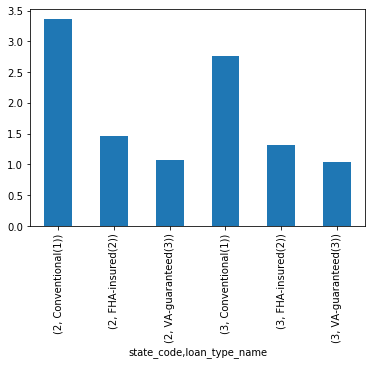

In [10]:
state_2n3.groupby(['state_code','loan_type_name'])['rate_spread'].mean().plot(kind='bar')